# Zero to Hero

## 1.03  Construyendo un arbol

Se construye un arbol de decisión, se ven distintas formas de pasar los parámetros y distintas formas de dibujarlo.
<br>
Se muestran funcionalidades básicas de0la libreria  *data.table*

In [1]:
library("data.table") # cargo la libreria  data.table
library("rpart") # cargo la libreria  rpart


In [2]:
options(repr.plot.width = 25, repr.plot.height = 25) # para que los gráficos me salgan legibles


In [3]:
setwd("~/buckets/b1/")


In [4]:
dataset <- fread("~/datasets/vivencial_dataset_pequeno.csv")


Ahora entreno un arbol de decision
<br>
"clase_ternaria ~ ."  significa predecir clase_ternaria utilizando *todo el resto* de las variables del dataset

In [5]:
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107]
)


Imprimo el modelo con la muy básica funcion print() de la libreria rpart

In [6]:
print(modelo)


n= 164596 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 164596 2385 CONTINUA (0.006907823 0.007582201 0.985509976) *


Esta impresión no es gráfica. No me sirve.
<br>
a pesar que no me sirve, he encontrado una piedra en el camino, me está generando un arbol con un solo nodo, con solo la raiz

Busco bibliografía y encuentro que existe la libreria  **rpart.plot** que grafica arboles generados con la libreria  *rpart*

In [7]:
library("rpart.plot")


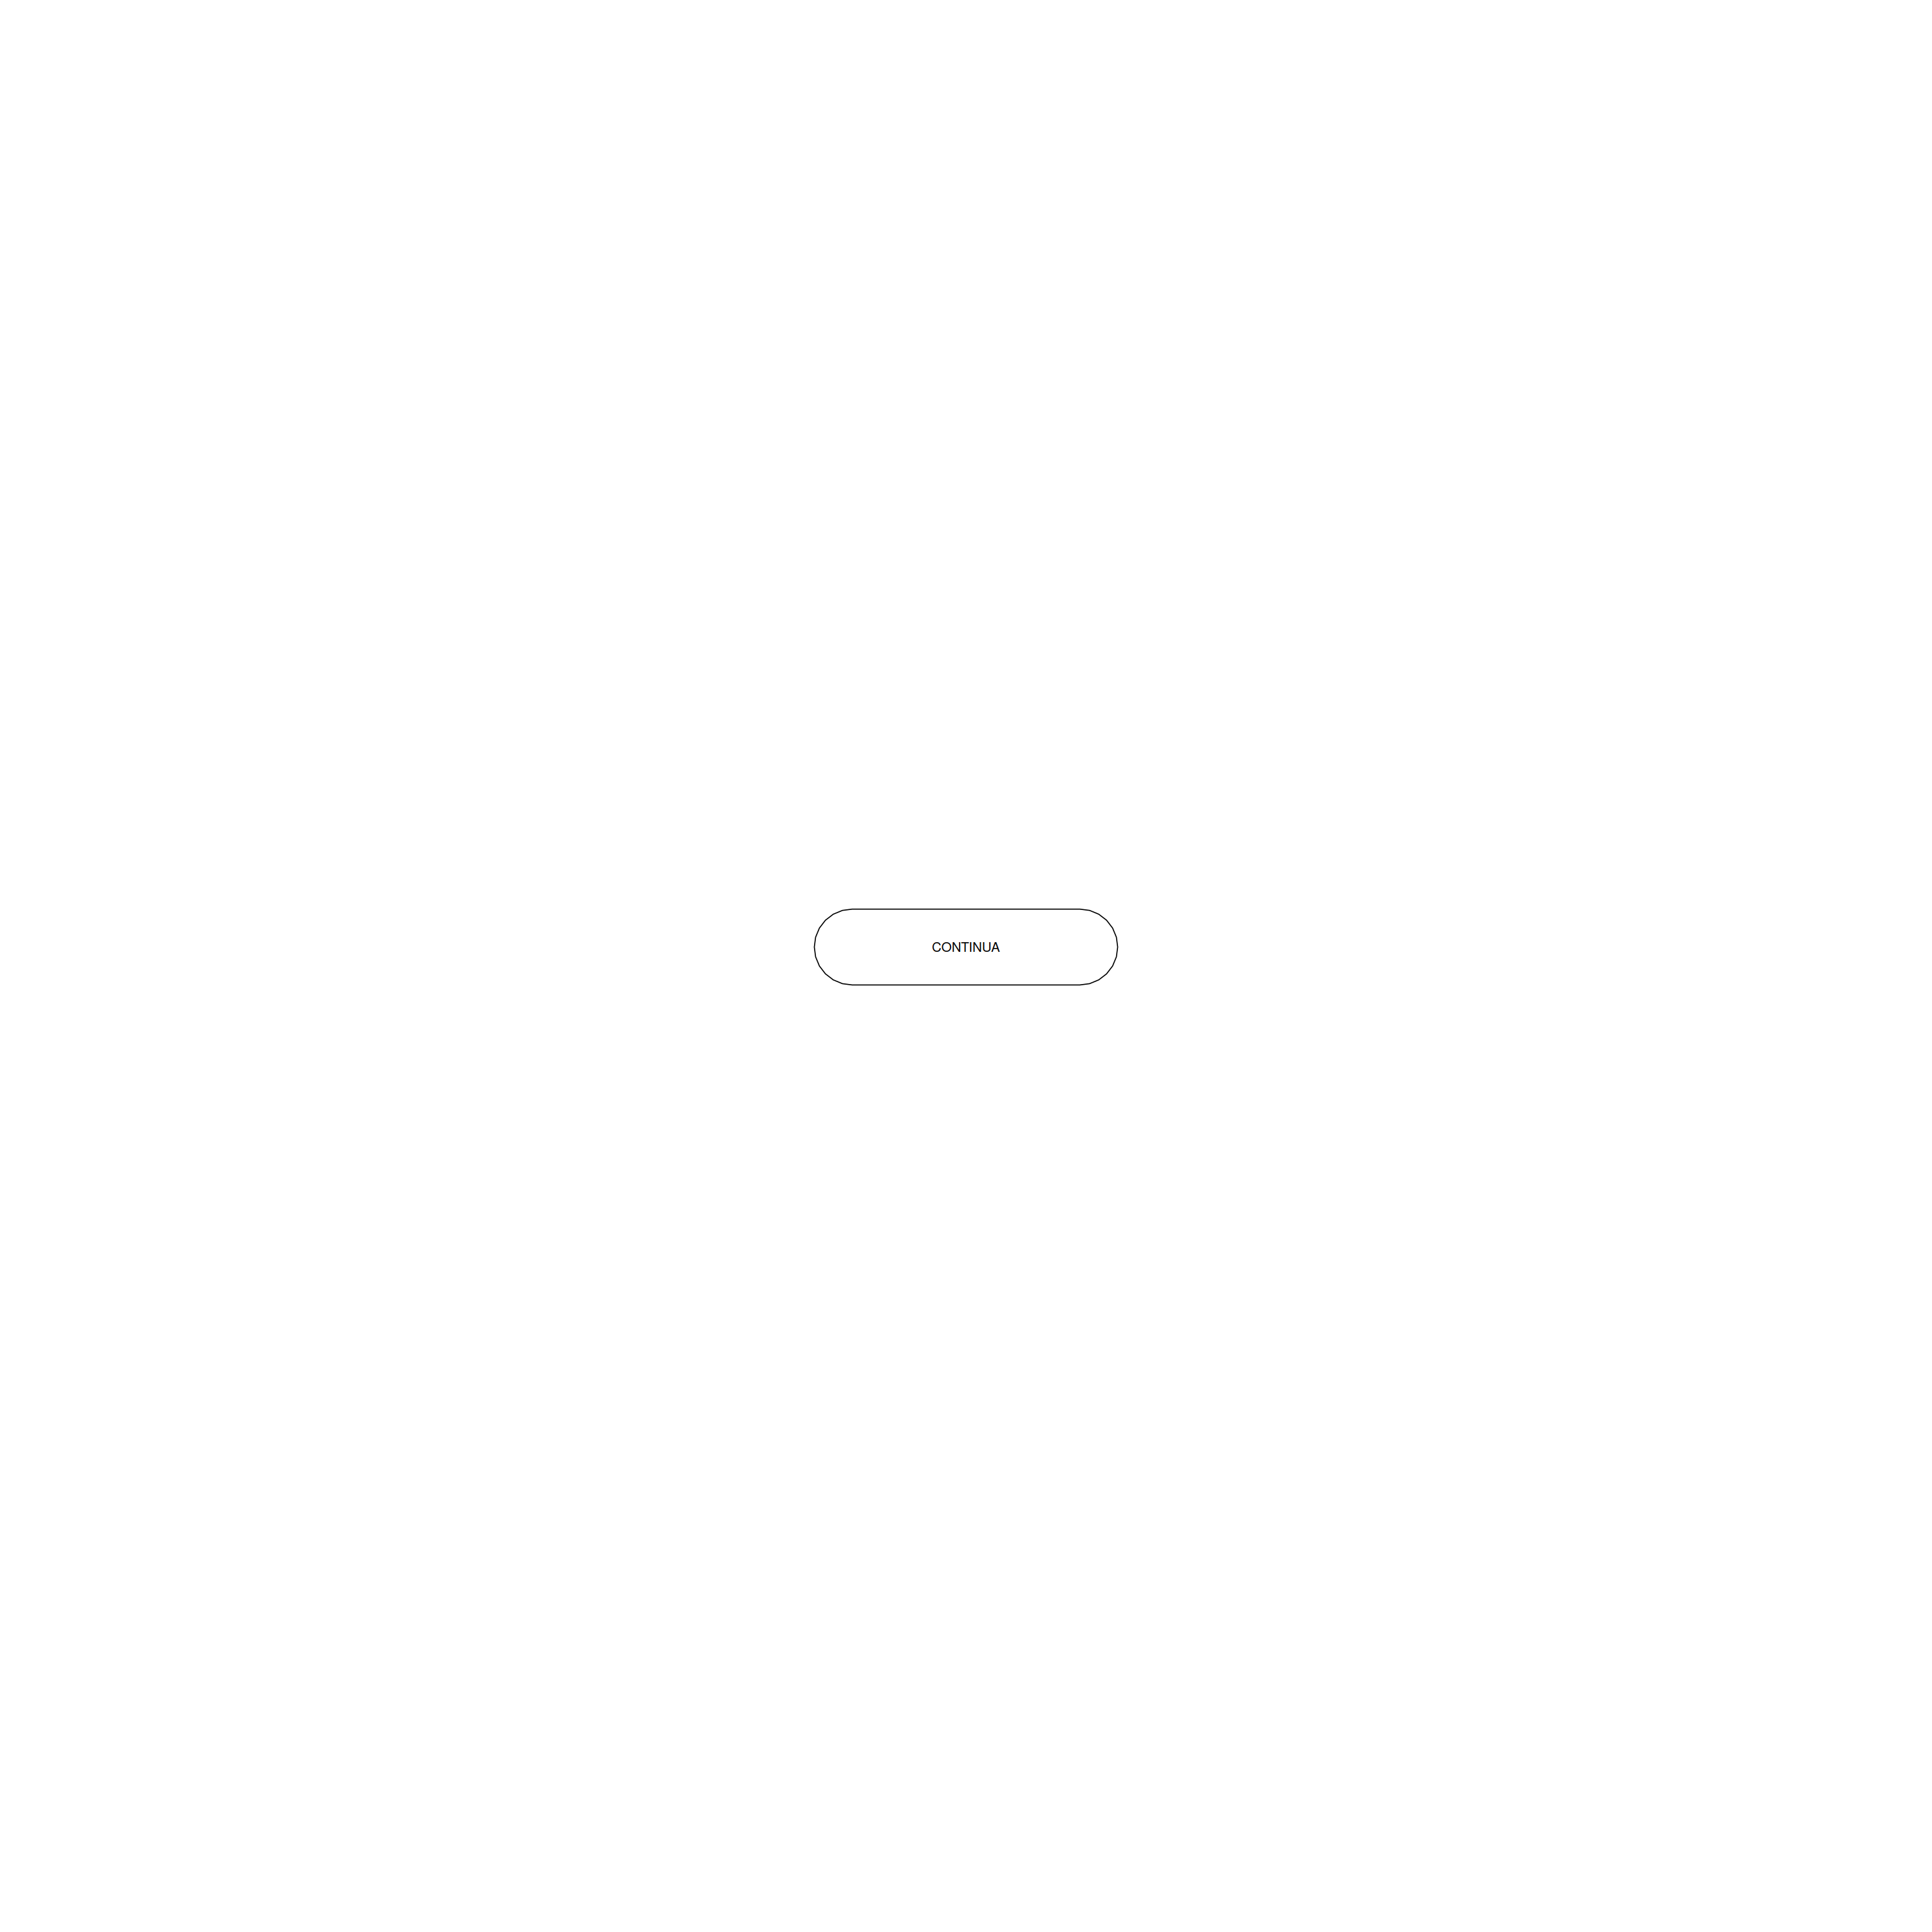

In [8]:
rpart.plot::prp(modelo)


Me ha salido una impresión del arbol, que es un solo nodo, pero solo dice continua.
<br>
leo la documentacion de la librería rpart.plot   https://cran.r-project.org/web/packages/rpart.plot/rpart.plot.pdf

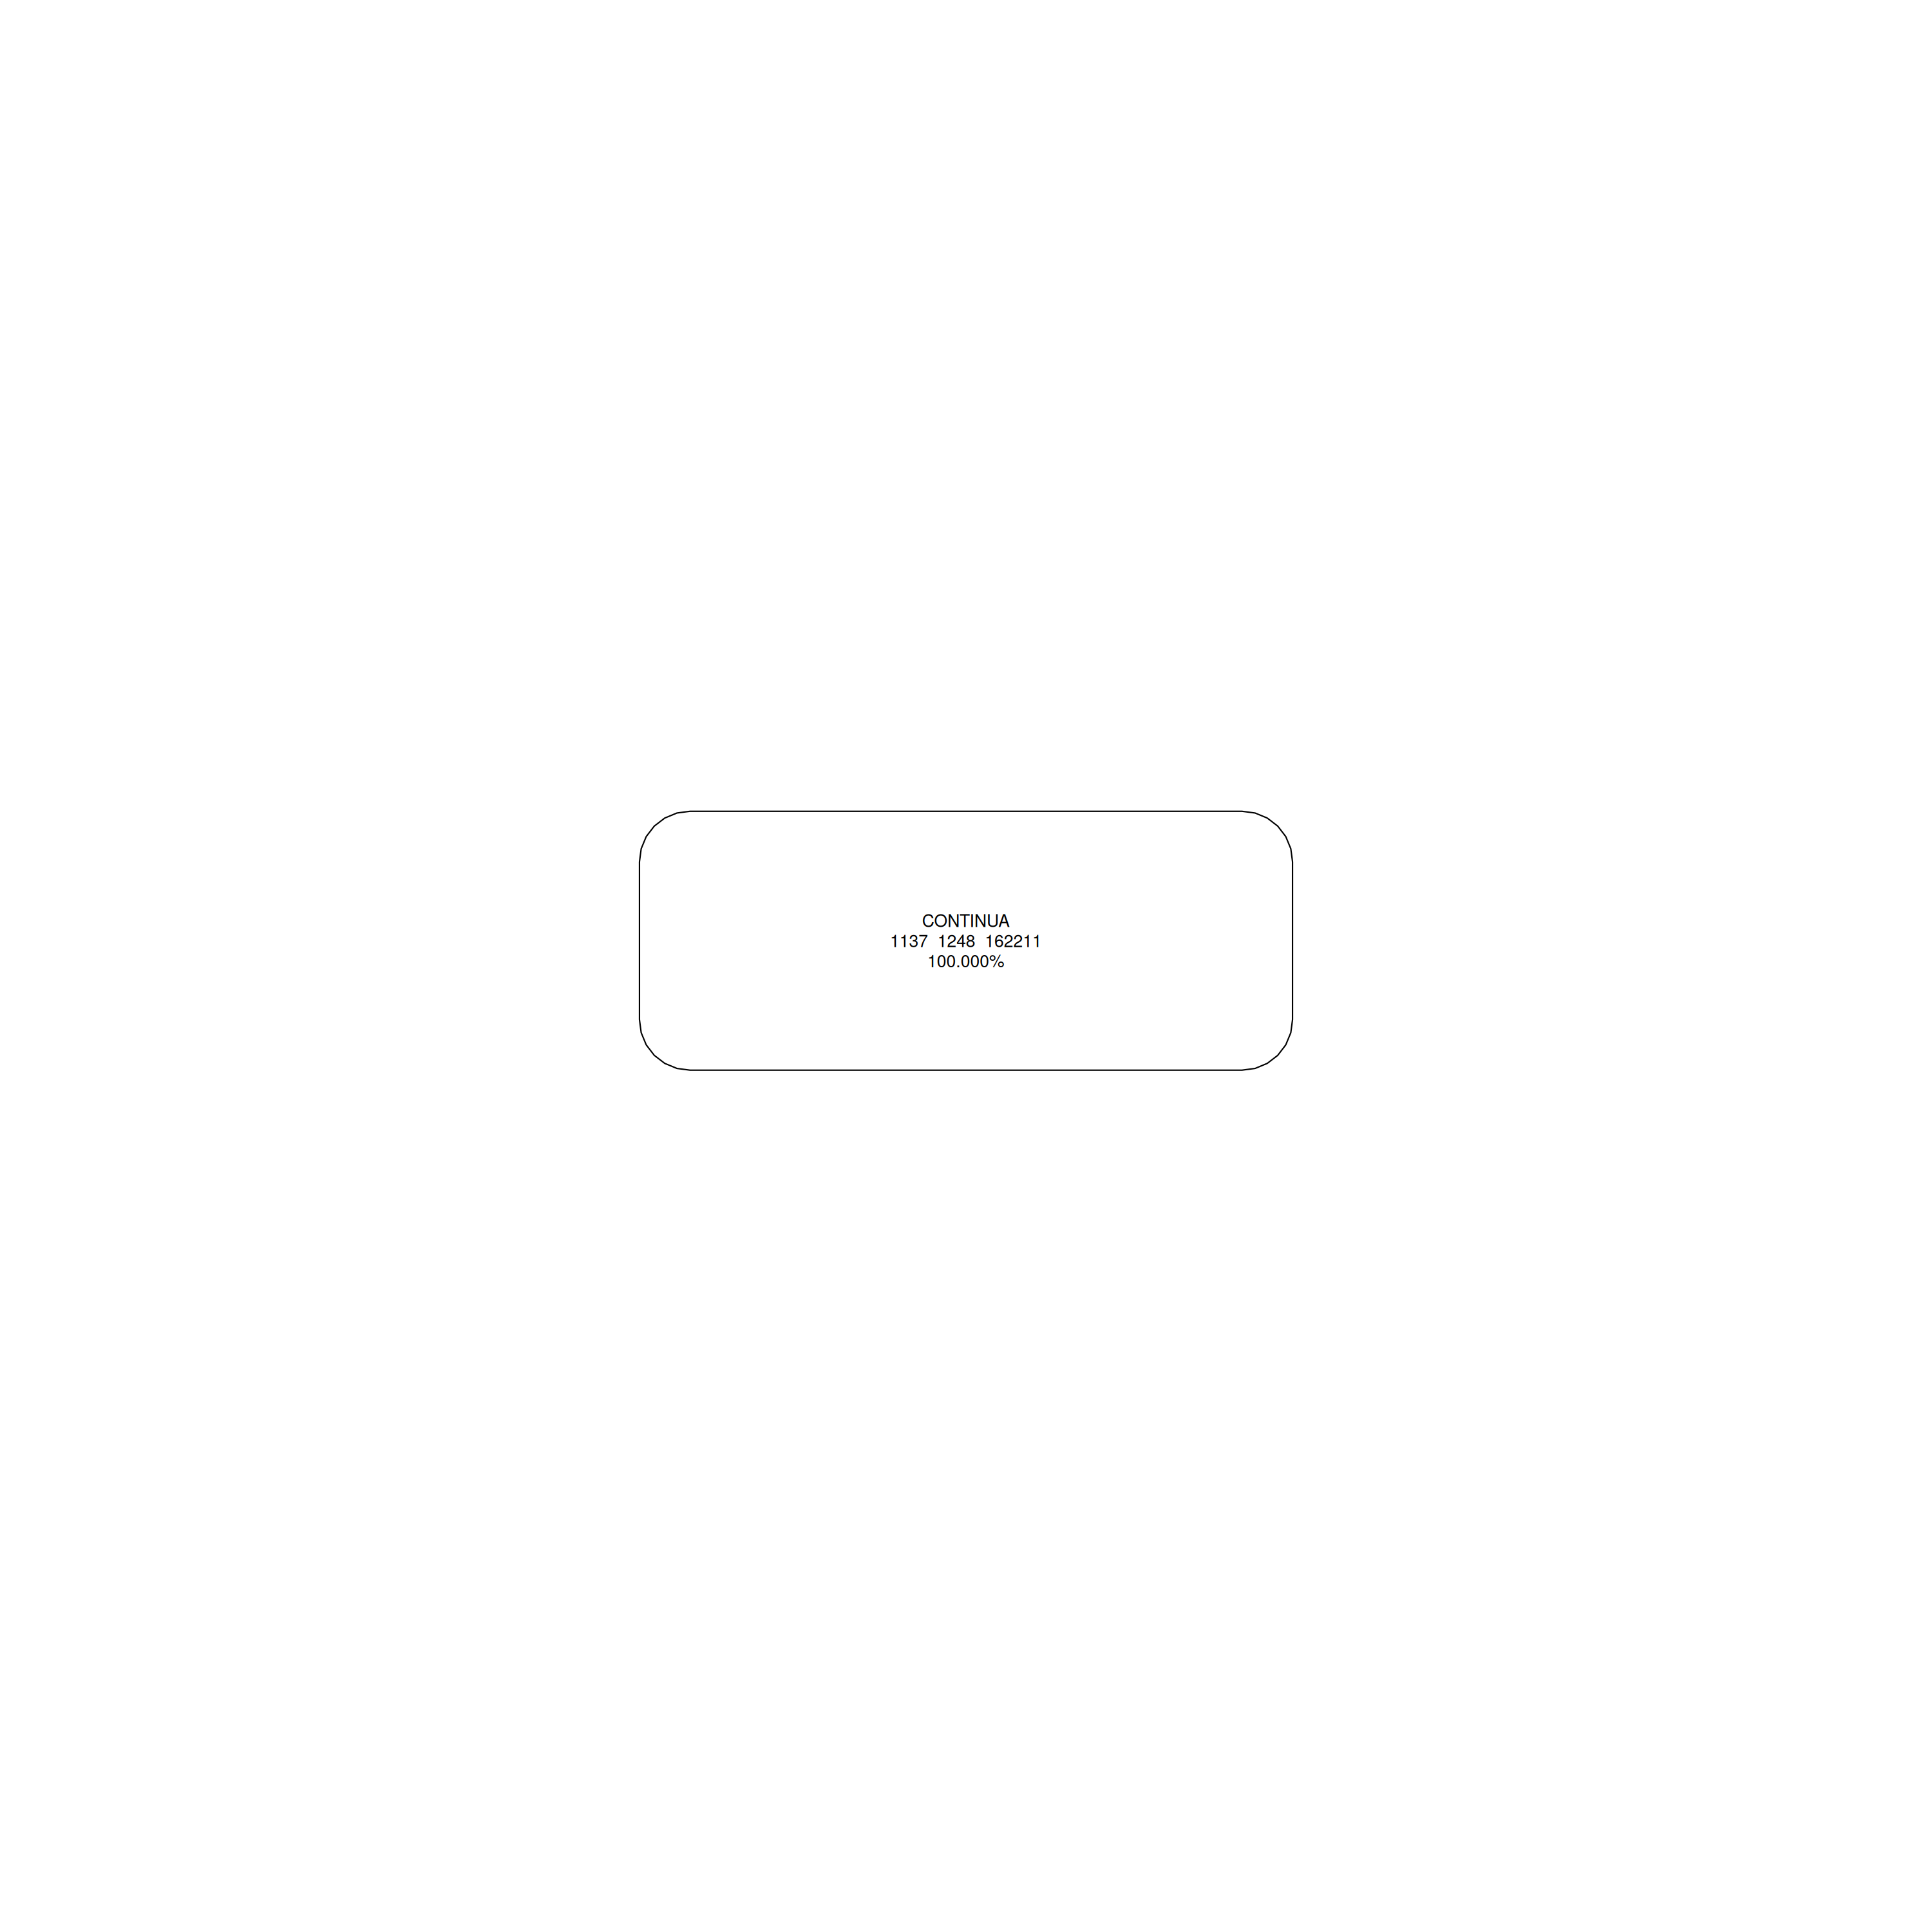

In [9]:
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.3)


Ha salido solo la raiz del arbol
<br>
Los tres numeros que muestra en el nodo con la cantidad de BAJA+1, BAJA+2 y CONTINUA, en ese orden, alfabetico.
<br>
la cantidad de CONTINUA   la está mostrando en notacion científica

### cambio hiperparámetros del arbol para salga algo mas que un solo nodo

El hiperparámetro cp  *complexity*   limita el split de los nodos.
<br>
El default es  cp=0.05
<br>
Pruebo con cp=0.0  a ver si "se abre el arbol"

Leo la documentación de la libreria rpart  https://cran.r-project.org/web/packages/rpart/rpart.pdf   y veo que existe un hiperparámetro de la funcion rpart  llamado **xval** que es para hacer cross validation, que por default viene seteado en xval=10 .   No me interesa en este momento que haga cross validation, para evitarlo voy a poner  *xval=0*

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


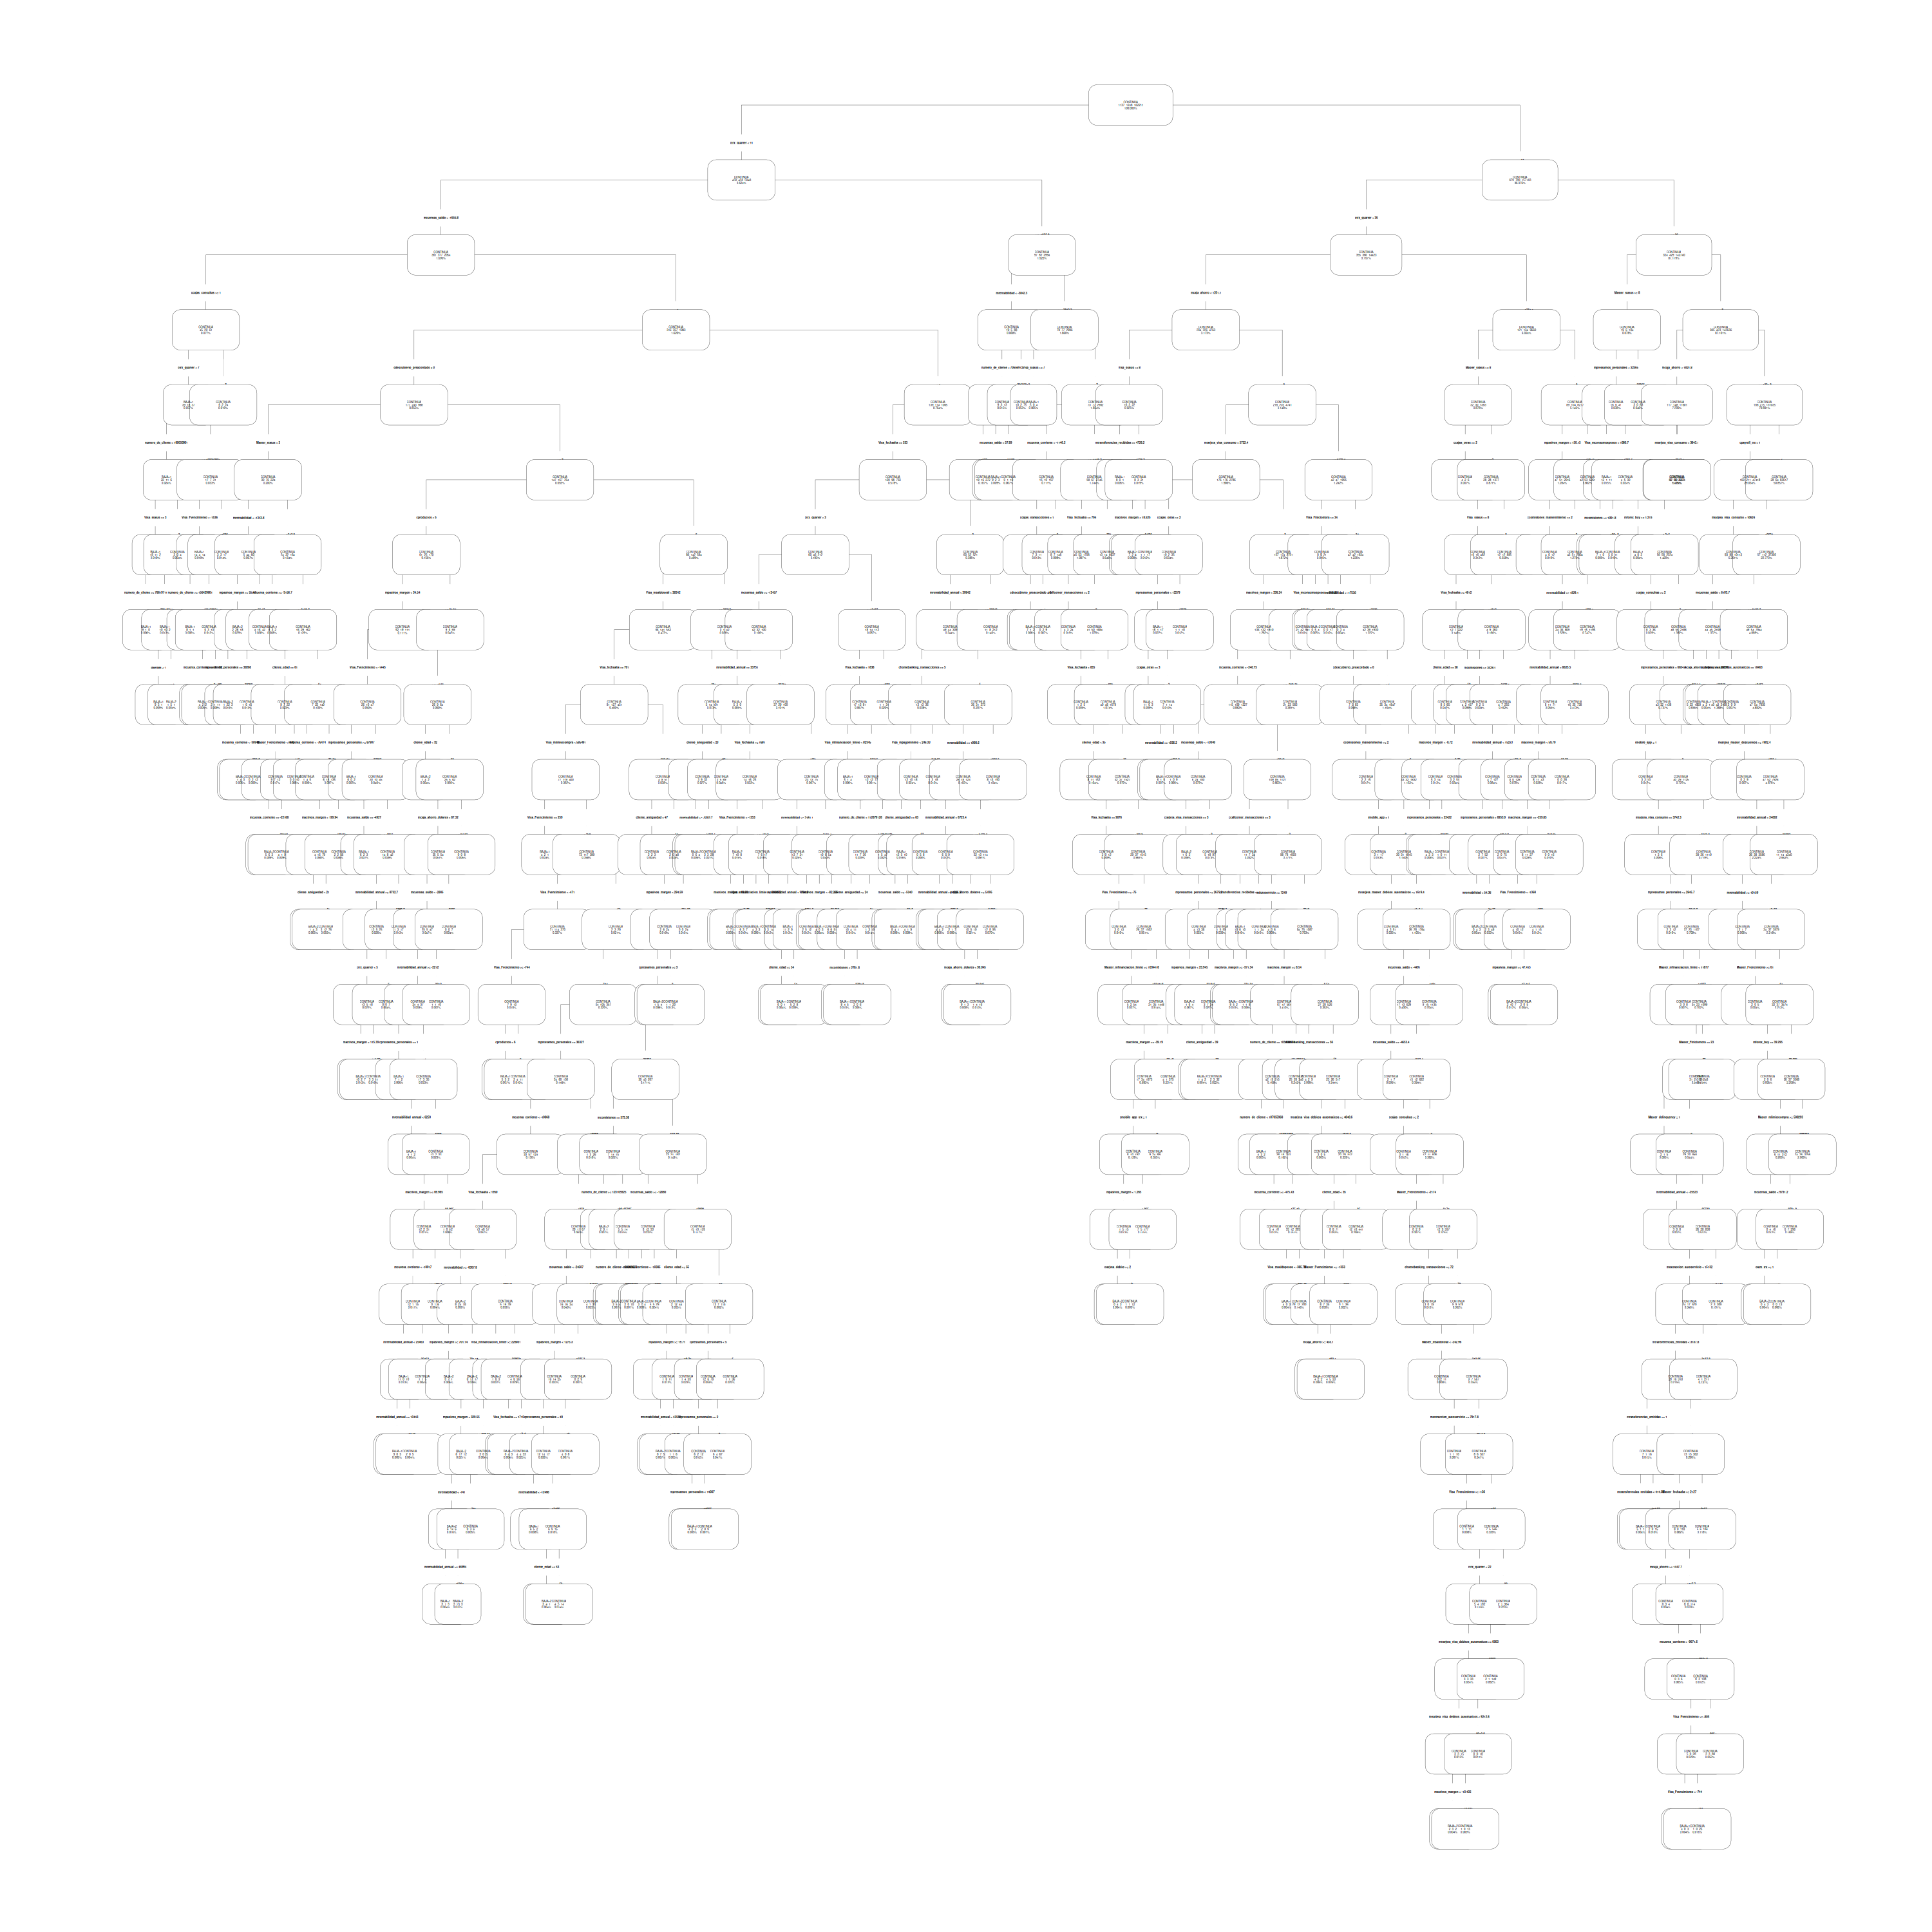

In [10]:
# genero el modelo
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107],
    xval = 0,
    cp = 0.0
)

# imprimo el modelo graficamente
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.3)


sale un arbol de gran profundidad  que ni se puede visualizar
<br>
el mensaje  ""labs do not fit even at cex 0.15, there may be some overplotting"" me dice que no pudo dibujarlo correctamente
<br>
lamentablemente me doy cuenta la libreria rpart.plot es mala
<br>
establezco  maxdepth=2 para poder apreciarlo

Warning message:
“cex and tweak both specified, applying both”


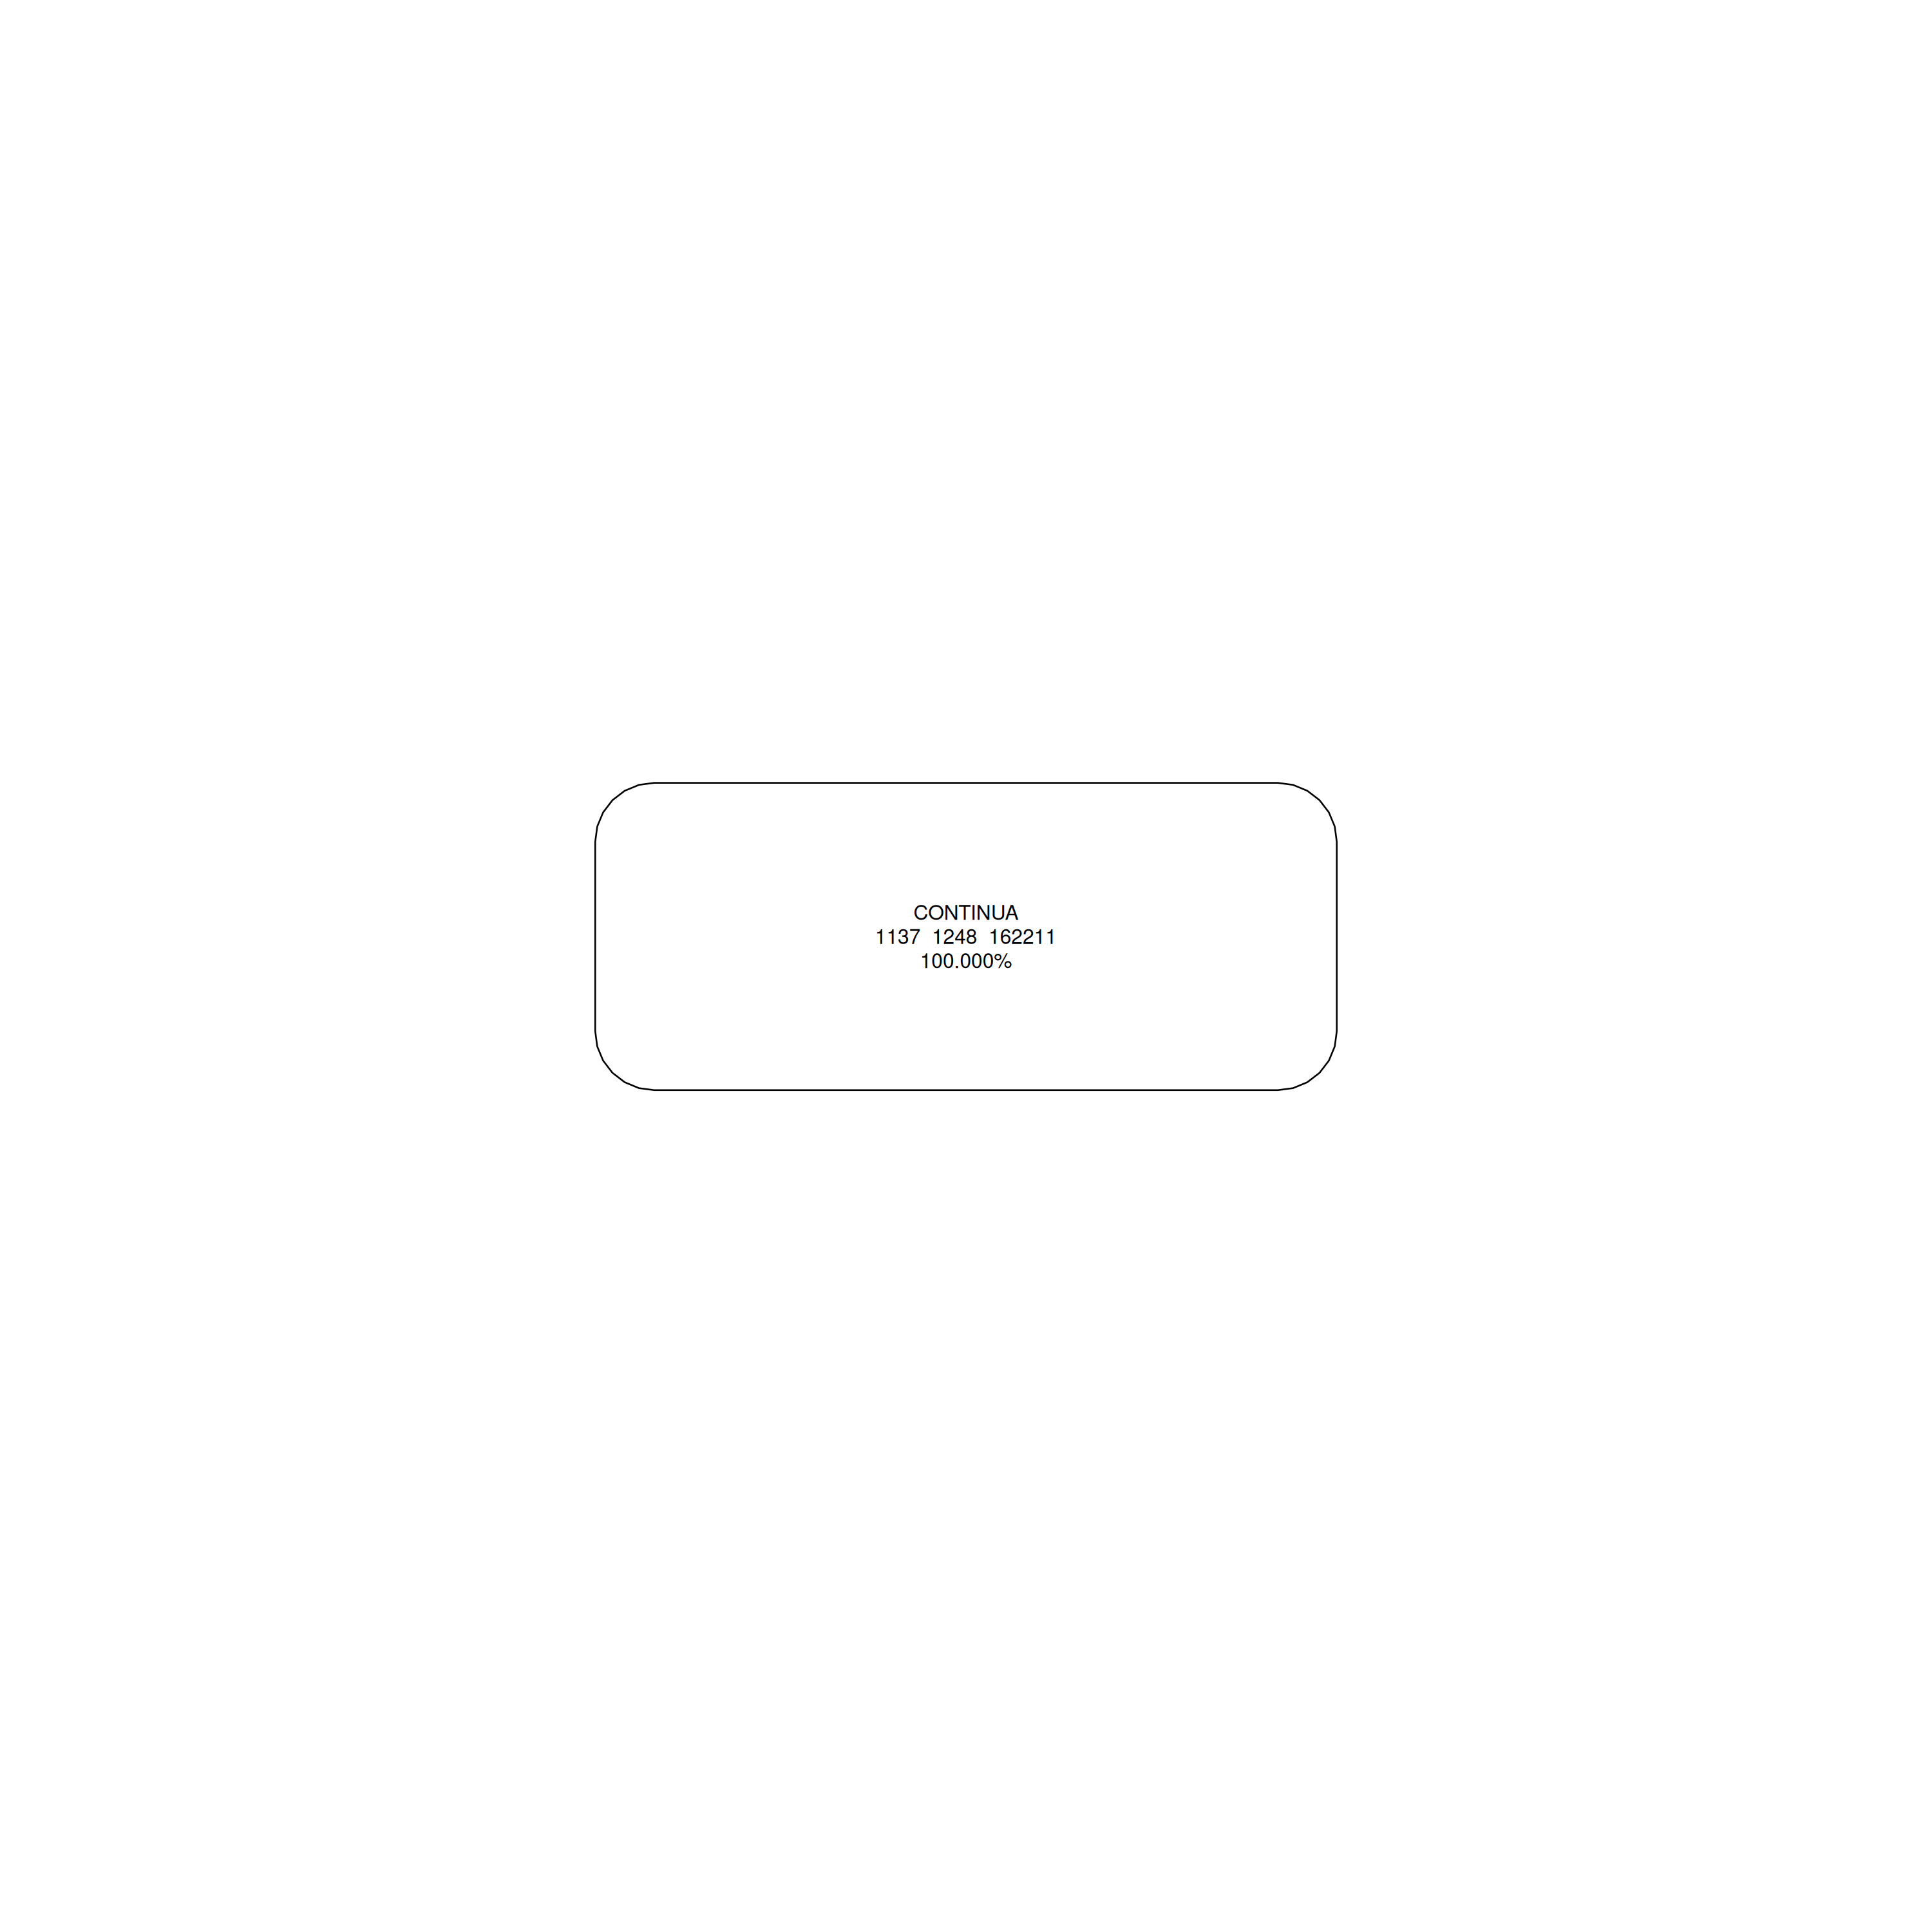

In [11]:
# genero el modelo
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107],
    xval = 0,
    cp = 0.0,
    maxdepth = 2
)

# imprimo el modelo graficamente
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.3, cex = 1.2)


Esperaba ver un albol de profundidad 2 sin embargo, por alguna misteriosa razón, se ha generado un arbol con un solo nodo.
<br>
Corto por lo sano,  y establezco  cp=-1  para que siempre se abra el arbol

#genero el modelo
modelo < -rpart(formula="clase_ternaria ~ .",
    data=dataset1,
    xval=0,
    cp=-1,
    maxdepth=3)

#imprimo el modelo graficamentne
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3)

Warning message:
“cex and tweak both specified, applying both”


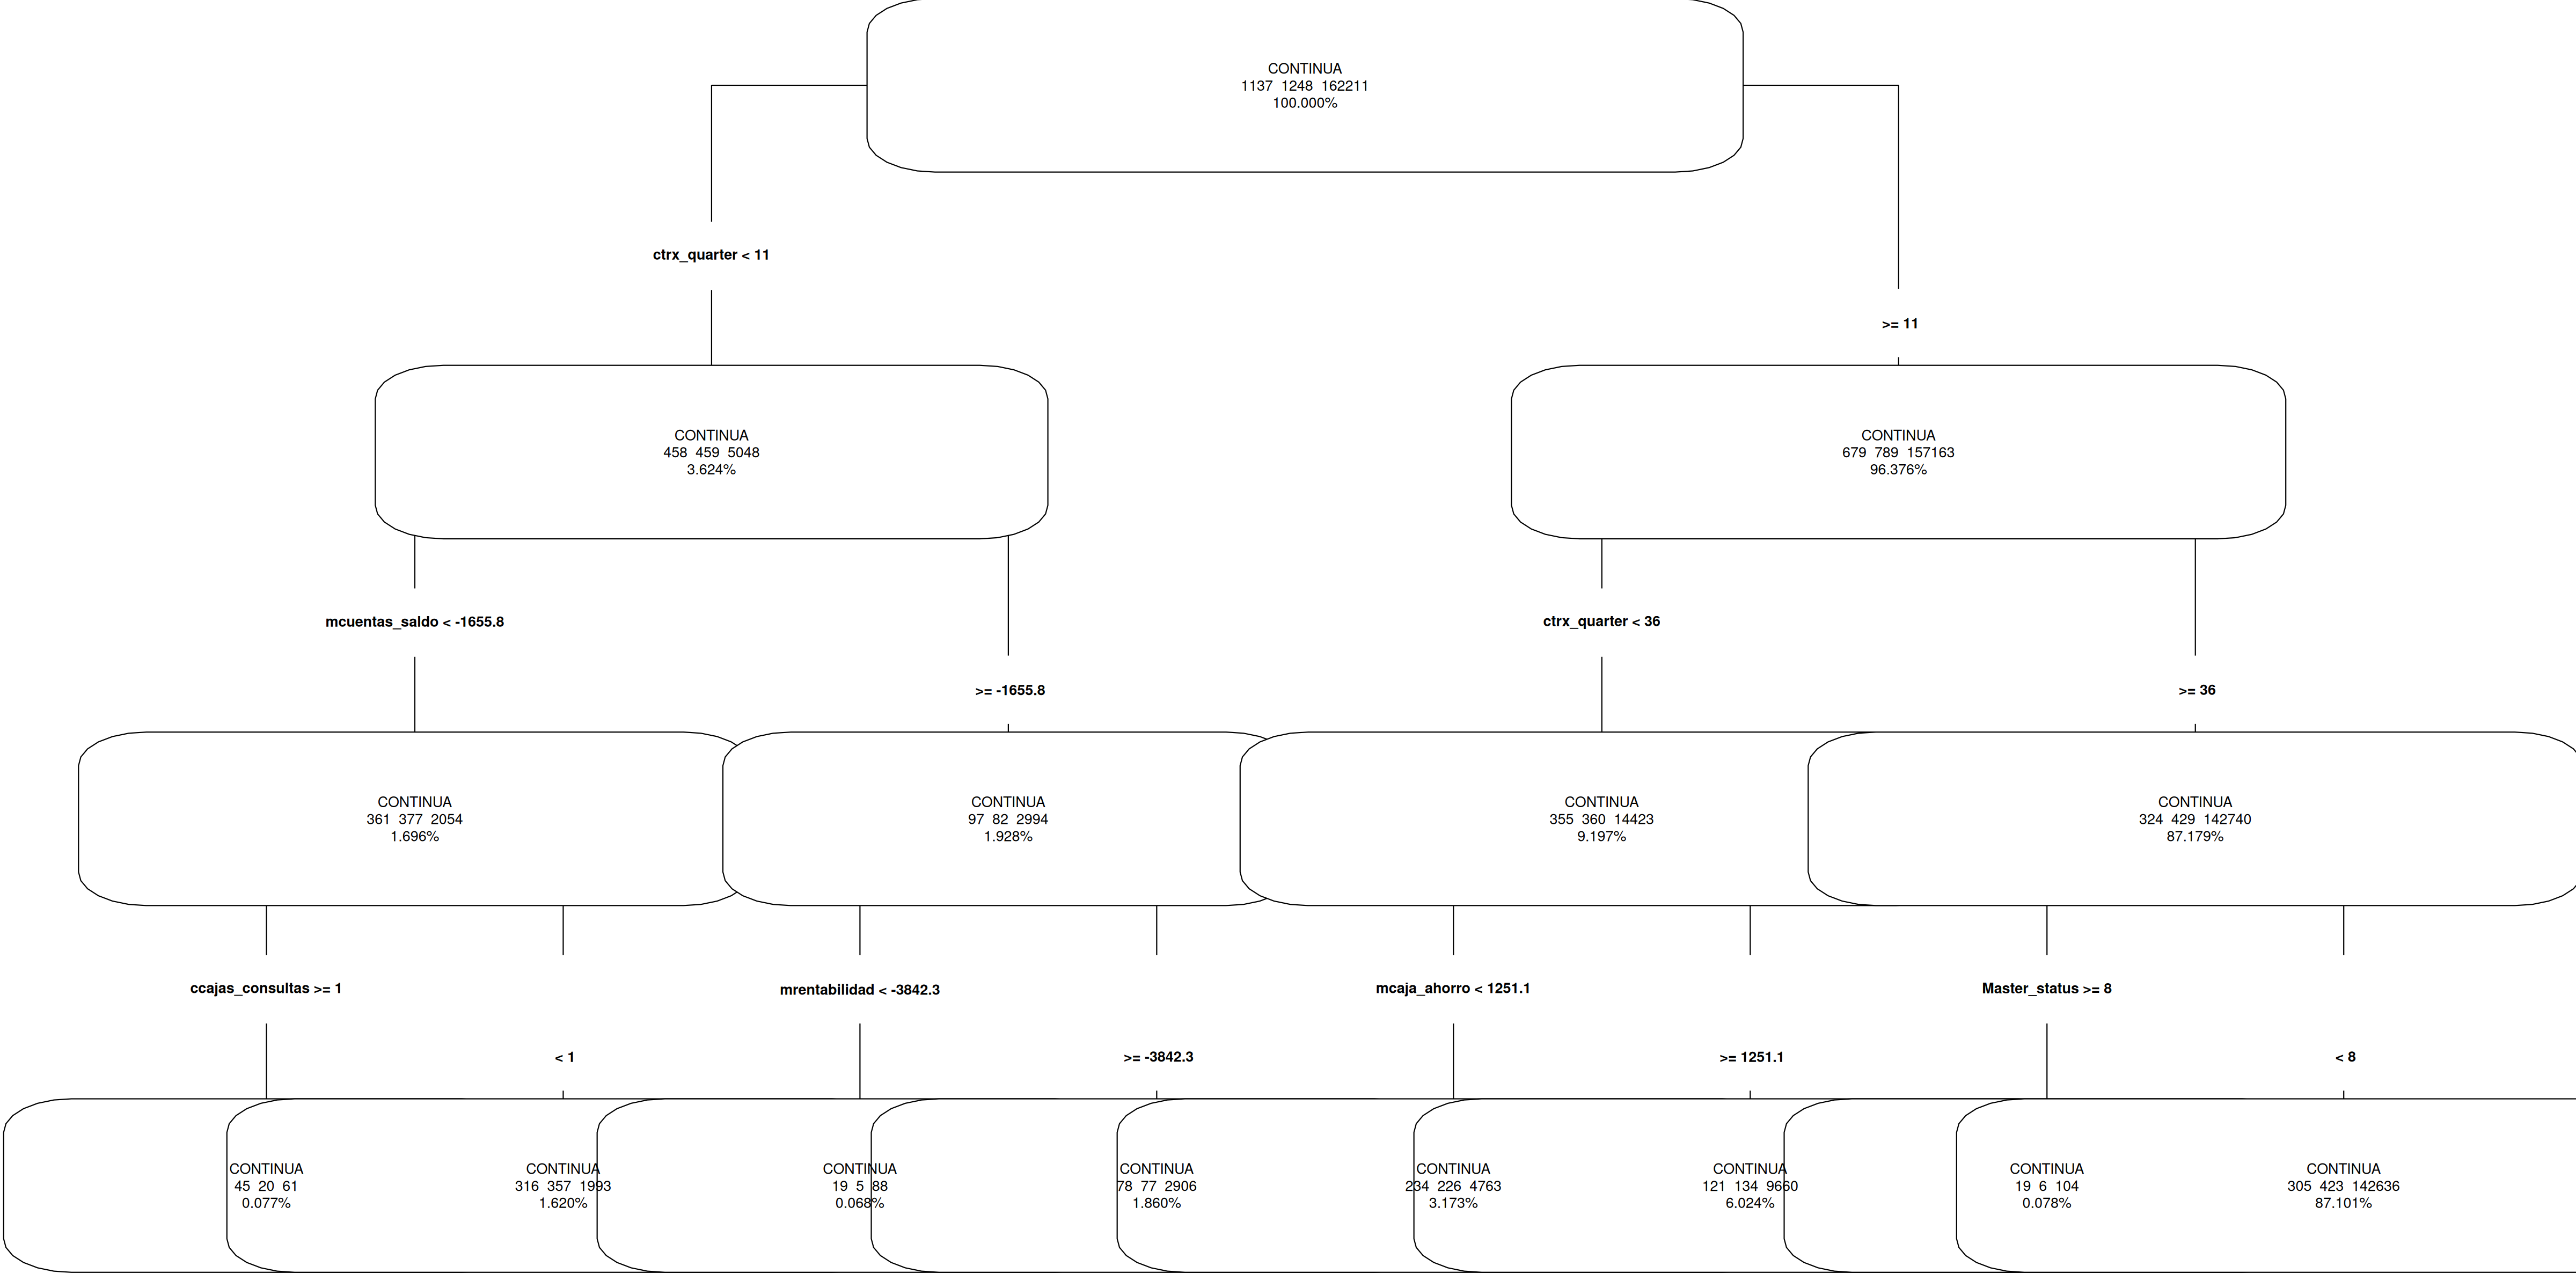

In [12]:
# genero el modelo
modelo <- rpart(
    formula = "clase_ternaria ~ .",
    data = dataset[foto_mes == 202107],
    xval = 0,
    cp = -1,
    maxdepth = 3
)

# imprimo el modelo graficamente
options(repr.plot.width = 40, repr.plot.height = 20)
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.1, cex = 1.2)


Warning message:
“cex and tweak both specified, applying both”


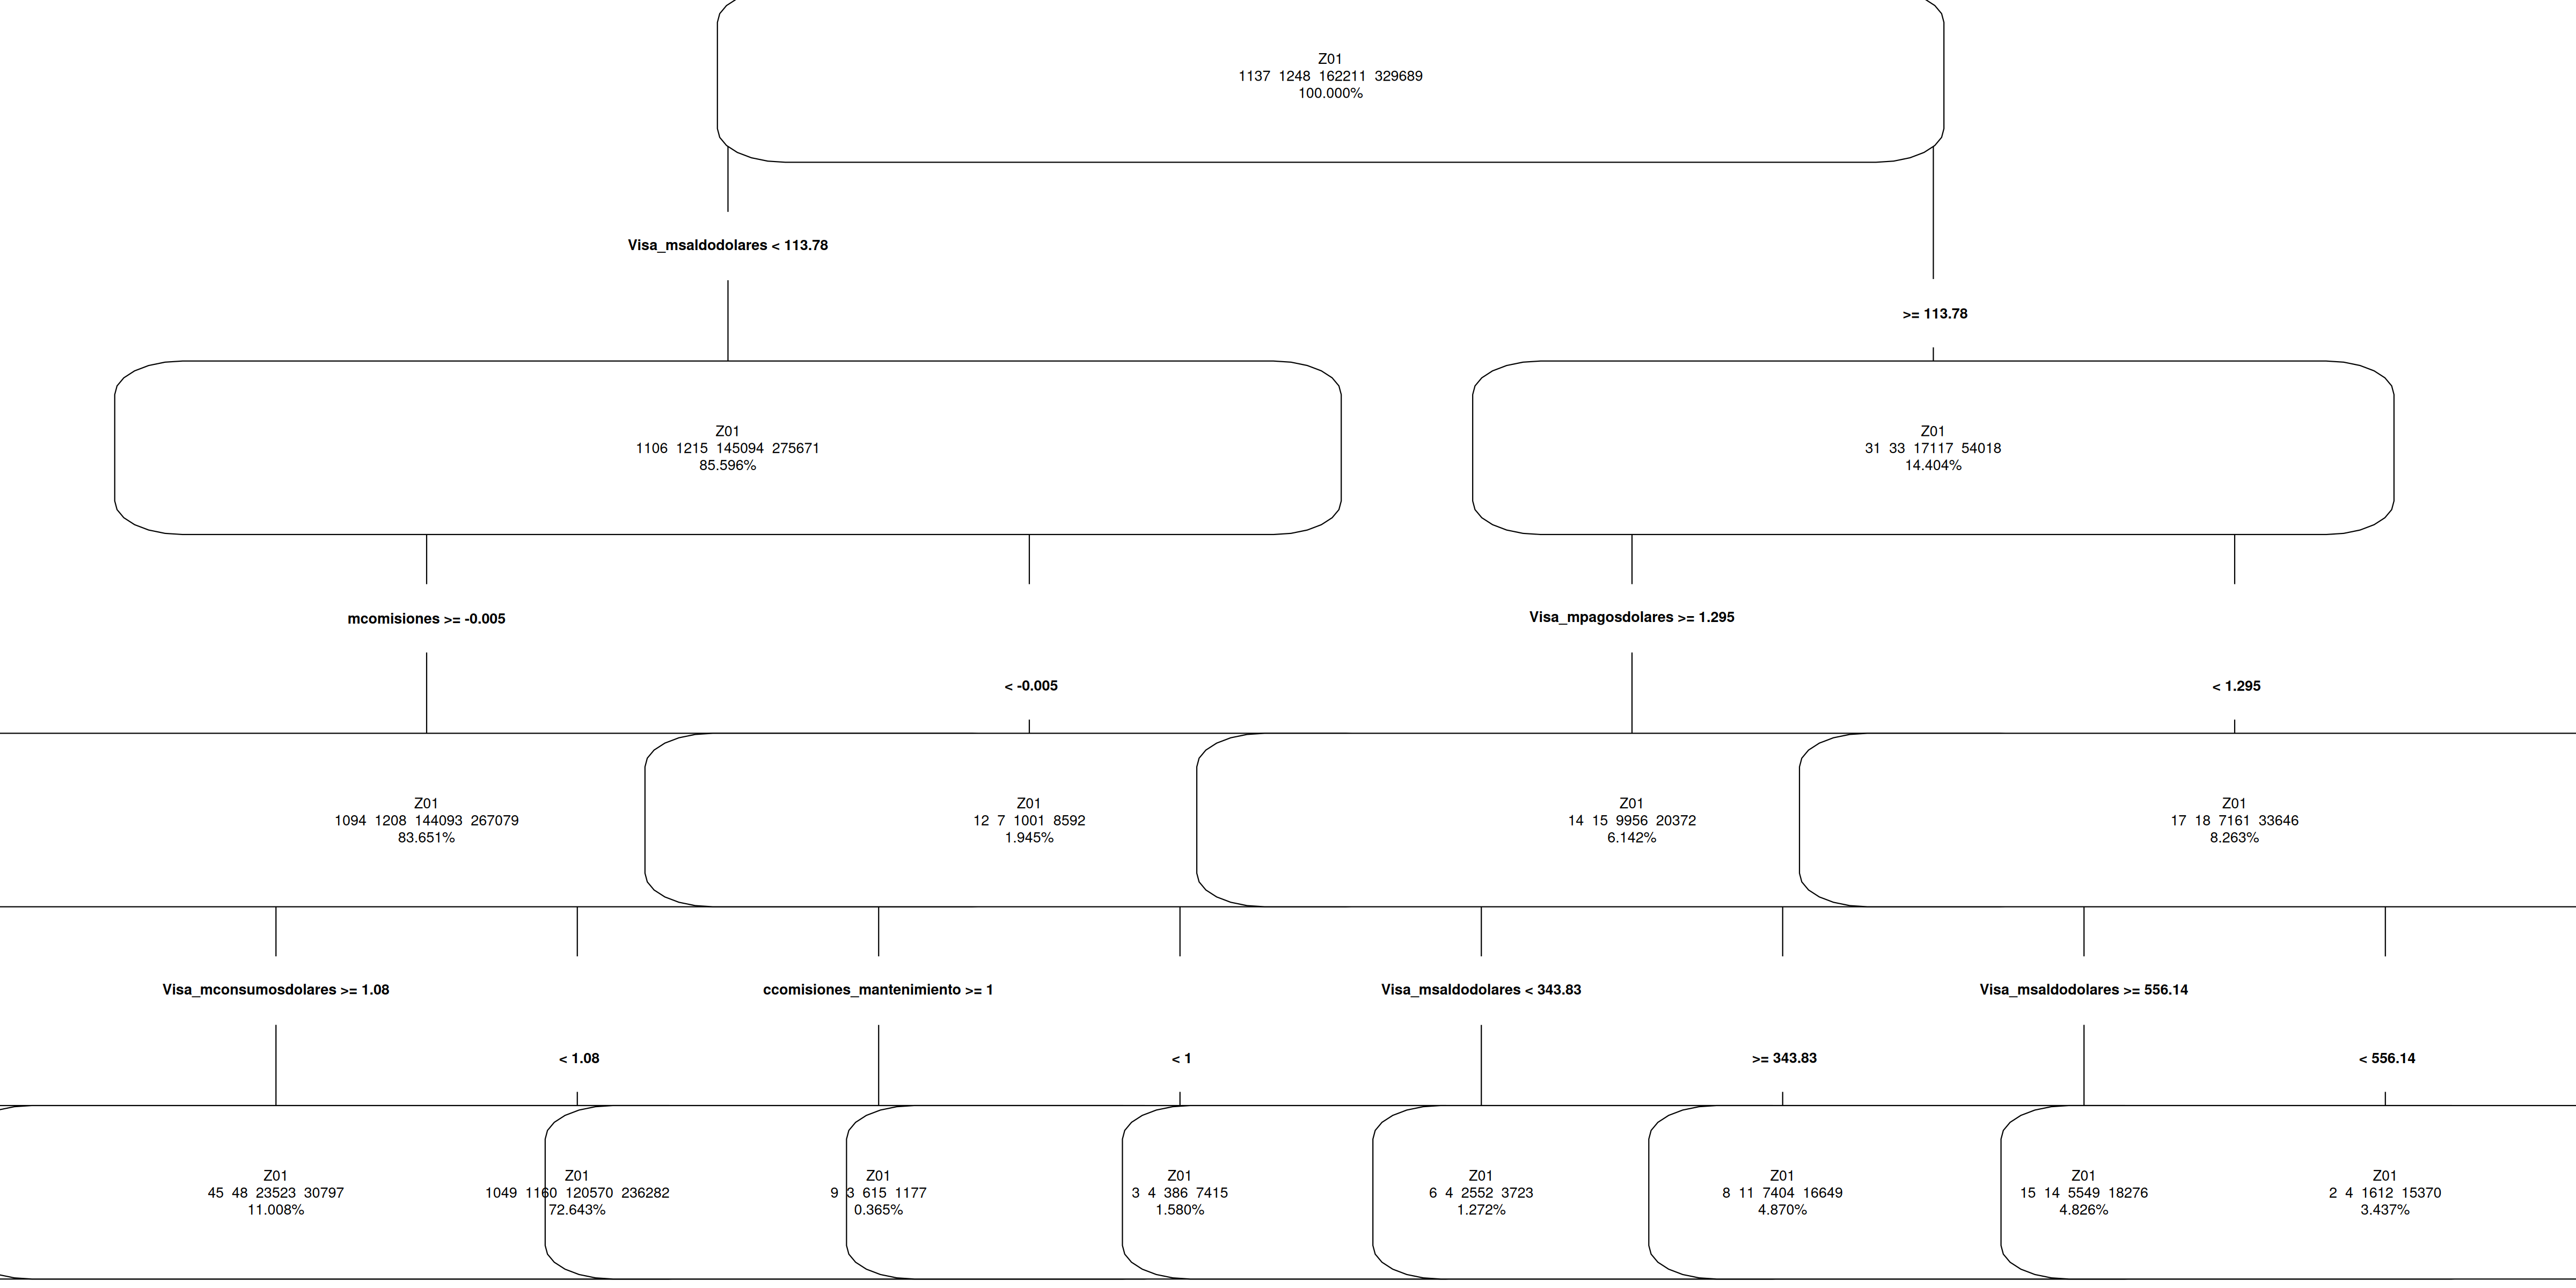

In [13]:
# genero el modelo
dataset2 <- copy(dataset)
julio <- copy(dataset[foto_mes == 202107])
dataset2[foto_mes == 202109, clase_ternaria := "Z01"]
julio[, clase_ternaria := "Z01"]
dataset2 <- rbind(dataset2, julio)
dataset2[, foto_mes := NULL]
setorder(dataset2, clase_ternaria)

modelo <- rpart(
    formula = "clase_ternaria ~ . -Master_fultimo_cierre -Visa_fultimo_cierre -mcomisiones_mantenimiento",
    data = dataset2,
    xval = 0,
    cp = -1,
    maxdepth = 3
)

# imprimo el modelo graficamente
options(repr.plot.width = 40, repr.plot.height = 20)
prp(modelo, extra = 101, digits = -5, branch = 1, type = 4, varlen = 0, faclen = 0, tweak = 1.1, cex = 1.2)


In [14]:
modelo$splits


,count,ncat,improve,index,adj
Visa_msaldodolares,471701,-1,1381.2029907,113.780,0.0000000000
mcomisiones,494285,1,1146.5299598,-0.005,0.0000000000
mcomisiones_otras,494285,1,1143.1262631,-0.005,0.0000000000
ctarjeta_visa_descuentos,494285,1,733.9164716,0.500,0.0000000000
cliente_antiguedad,494285,-1,694.0481639,326.500,0.0000000000
mtarjeta_visa_consumo,22584,-1,0.8512829,261531.065,0.0147333530
ctarjeta_visa_debitos_automaticos,0,-1,0.8507042,16.500,0.0108990295
ctarjeta_visa_transacciones,0,-1,0.8498010,79.500,0.0049157994
Visa_msaldototal,0,-1,0.8496887,390289.605,0.0041714069
Visa_mpagado,0,-1,0.8494131,253326.845,0.0023455386


### Disgresión : aprendo a borrar la memoria

Listo los objetos que estan en la memoria de R en este momento

In [15]:
ls()


[1] "dataset"  "dataset2" "julio"    "modelo"

creo una variable a ver que sucede

In [16]:
a <- 1


me vuelvo a fijar que objtetos estan en la memoria, deberia aparecer la nueva variable **a**

In [17]:
ls()


[1] "a"        "dataset"  "dataset2" "julio"    "modelo"

tal cual esperaba, aparece el nuevo objeto, la variable  **a**

Me fijo cuanta memoria esta disponible

In [18]:
gc()


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,795080,42.5,2569442,137.3,3211802,171.6
Vcells,127237932,970.8,375995296,2868.7,375831654,2867.4


Borro **TODOS** los objetos que estan en la memoria de R

In [19]:
rm(list = ls())


Me vuelvo a fijar cuanta memoria hay disponible

In [20]:
gc()


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,793604,42.4,2569442,137.3,3211802,171.6
Vcells,1703450,13.0,300796237,2294.9,375831654,2867.4


llama a **gc()** garbaje collection, que me va a liberar mas aún la memoria
<br>
https://cran.r-project.org/web/packages/profmem/vignettes/profmem.html

Ahora si, limpie bore todos los objetos de R y limpie la memoria